In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 1000
sns.set(style = 'darkgrid')

In [2]:
df = pd.read_csv("/Users/senth/Downloads/train_1.csv")

In [3]:
df.shape

(145063, 551)

In [4]:
Exog_Campaign_eng = pd.read_csv("/Users/senth/Downloads/Exog_Campaign_eng")

In [5]:
Exog_Campaign_eng.shape

(550, 1)

In [6]:
df.Page.sample(20)

57160                                       藤岡麻美_ja.wikipedia.org_mobile-web_all-agents
128531                                   Le_Caravage_fr.wikipedia.org_all-access_spider
134374                                          木村佳乃_ja.wikipedia.org_all-access_spider
59178                         ねじ巻き精霊戦記_天鏡のアルデラミン_ja.wikipedia.org_mobile-web_all-agents
30959                                        黃心穎_zh.wikipedia.org_all-access_all-agents
116610                                Frankreich_de.wikipedia.org_mobile-web_all-agents
110590                     Diathrausta_minutalis_en.wikipedia.org_all-access_all-agents
44256         Category:Videos_of_animal_sex_commons.wikimedia.org_all-access_all-agents
49221                                 Kray-Zwillinge_de.wikipedia.org_all-access_spider
45341     Category:Vintage_nude_photographs_commons.wikimedia.org_all-access_all-agents
57489                                       旋毛虫症_ja.wikipedia.org_mobile-web_all-agents
40855                           

In [7]:
df.Page.str.split("_").apply(lambda x:x[3]).head(20)

0               spider
1               spider
2               spider
3               spider
4                 Love
5               spider
6               spider
7               spider
8               spider
9               spider
10              spider
11    zh.wikipedia.org
12                 are
13              spider
14              spider
15              spider
16              spider
17          all-access
18          all-access
19              spider
Name: Page, dtype: object

In [8]:
data = df.copy()

In [9]:
data.duplicated().sum()

0

In [10]:
data.dtypes.sample(10)

2016-03-23    float64
2016-05-14    float64
2015-07-27    float64
2016-01-18    float64
2016-04-16    float64
2015-11-07    float64
2016-05-13    float64
2015-12-21    float64
2015-08-09    float64
2015-11-25    float64
dtype: object

In [11]:
indexes = data.head(2).columns[1:][range(0,549,20)].values
indexes

array(['2015-07-01', '2015-07-21', '2015-08-10', '2015-08-30',
       '2015-09-19', '2015-10-09', '2015-10-29', '2015-11-18',
       '2015-12-08', '2015-12-28', '2016-01-17', '2016-02-06',
       '2016-02-26', '2016-03-17', '2016-04-06', '2016-04-26',
       '2016-05-16', '2016-06-05', '2016-06-25', '2016-07-15',
       '2016-08-04', '2016-08-24', '2016-09-13', '2016-10-03',
       '2016-10-23', '2016-11-12', '2016-12-02', '2016-12-22'],
      dtype=object)

<Axes: >

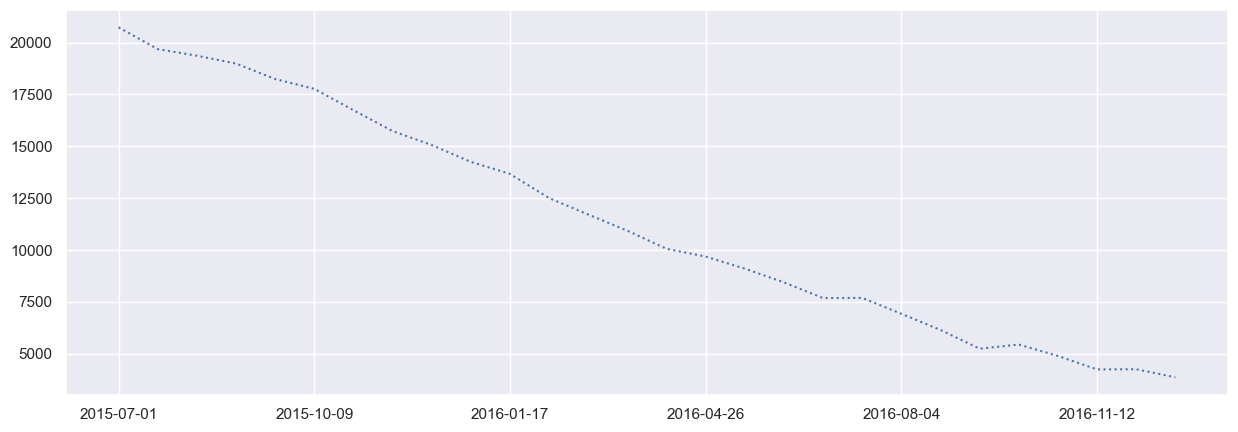

In [12]:
plt.figure(figsize=(15, 5))

data.isna().sum()[indexes].plot(linestyle='dotted')

from above plot , we can observe that with time , null values are decreasing.

recent dates have lesser null values

that means newer pages will have no data of prior to that page hosting date.

In [13]:
data.fillna(0,inplace =True)

In [14]:
data.isnull().sum()[indexes]

2015-07-01    0
2015-07-21    0
2015-08-10    0
2015-08-30    0
2015-09-19    0
2015-10-09    0
2015-10-29    0
2015-11-18    0
2015-12-08    0
2015-12-28    0
2016-01-17    0
2016-02-06    0
2016-02-26    0
2016-03-17    0
2016-04-06    0
2016-04-26    0
2016-05-16    0
2016-06-05    0
2016-06-25    0
2016-07-15    0
2016-08-04    0
2016-08-24    0
2016-09-13    0
2016-10-03    0
2016-10-23    0
2016-11-12    0
2016-12-02    0
2016-12-22    0
dtype: int64

# Exploratory Data Analysis

### Extracting Language 

In [15]:
data.Page[0]

'2NE1_zh.wikipedia.org_all-access_spider'

In [16]:
import re
re.findall(r'_(.{2}).wikipedia.org_', "2NE1_zh.wikipedia.org_all-access_spider")

['zh']

In [17]:
data.Page.str.findall(pat="_(.{2}).wikipedia.org_").sample(10)

53468     [fr]
96021     [es]
10788     [en]
27884     [fr]
101940    [ru]
122097    [ja]
124205    [ru]
143094    [es]
66008     [de]
41022     [en]
Name: Page, dtype: object

In [18]:
# extracting language 
def Extract_Language(name):
  if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 : 
    return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
  else: 
    return 'Unknown'

In [19]:
data["Language"] = data["Page"].map(Extract_Language)

In [20]:
data["Language"].unique()

array(['zh', 'fr', 'en', 'Unknown', 'ru', 'de', 'ja', 'es'], dtype=object)

In [21]:
dict_ ={'de':'German',
        'en':'English', 
        'es': 'Spanish', 
        'fr': 'French', 
        'ja': 'Japenese' , 
        'ru': 'Russian', 
        'zh': 'Chinese',
        'Unknown': 'Unknown_Language'}

data["Language"] = data["Language"].map(dict_)

In [22]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

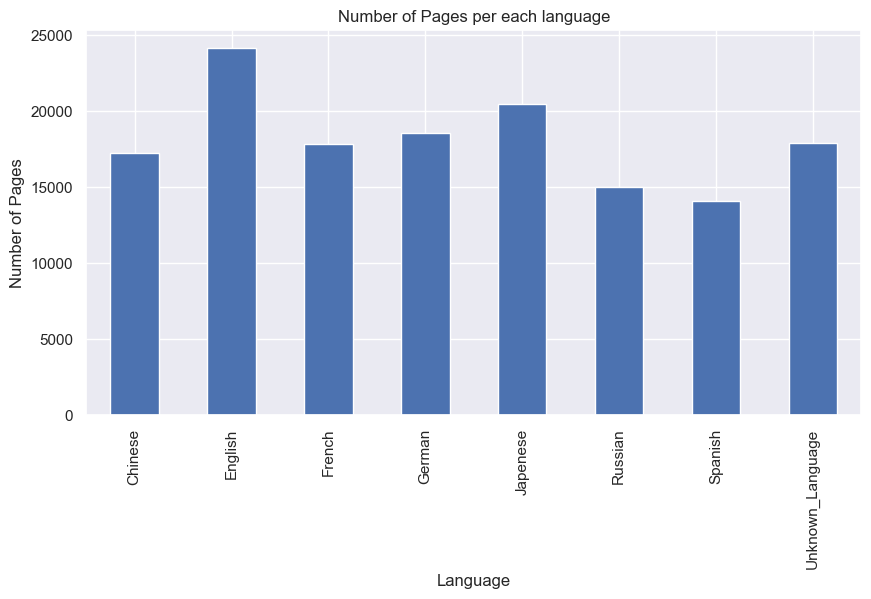

In [23]:
plt.figure(figsize=(10, 5))

data.groupby("Language")["Page"].count().plot(kind="bar")
plt.xlabel("Language")
plt.ylabel("Number of Pages")
plt.title("Number of Pages per each language")
plt.show()

In [24]:
from locale import normalize
data["Language"].value_counts(normalize=True) * 100

English             16.618986
Japenese            14.084225
German              12.785479
Unknown_Language    12.308445
French              12.271909
Chinese             11.876909
Russian             10.355501
Spanish              9.698545
Name: Language, dtype: float64

### Exrtacting ACCESS TYPE

In [25]:
data["Access_Type"] = data.Page.str.findall(r'all-access|mobile-web|desktop').apply(lambda x:x[0])

In [26]:
data["Access_Type"].value_counts(dropna=False, normalize=True)

all-access    0.512295
mobile-web    0.247748
desktop       0.239958
Name: Access_Type, dtype: float64

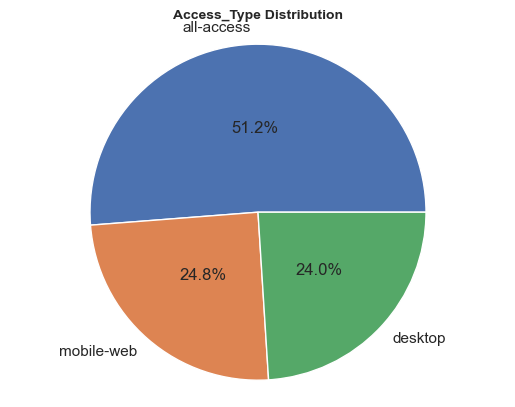

In [27]:
x = (data["Access_Type"].value_counts(dropna= False, normalize=True) * 100).values
y = (data["Access_Type"].value_counts(dropna= False, normalize=True) * 100).index

plt.pie(x,labels= y,radius=1.5,  autopct='%1.1f%%', pctdistance=0.5 )
plt.title(f'Access_Type Distribution', fontsize = 10, fontweight = 'bold')
plt.axis('equal')
plt.show()

### Exrtacting ACCESS ORIGIN

In [28]:
data.Page.sample(20)

1507                                                    陸貞傳奇_zh.wikipedia.org_all-access_spider
32551                                       Battle_of_Inchon_en.wikipedia.org_all-access_spider
15086               File:Liverpool_FC_1892-1896_kit.jpg_commons.wikimedia.org_all-access_spider
28168                                               100毛_zh.wikipedia.org_all-access_all-agents
38092                                 Hamilton_(musical)_en.wikipedia.org_all-access_all-agents
67313                                          Billy_Chapin_de.wikipedia.org_desktop_all-agents
134463                                                  金田勝年_ja.wikipedia.org_all-access_spider
69244           Relegation_zur_deutschen_Fußball-Bundesliga_de.wikipedia.org_desktop_all-agents
45918     Commons:Wiki_Loves_Monuments_2016_in_Peru_commons.wikimedia.org_all-access_all-agents
124507                         Заворотнюк,_Анастасия_Юрьевна_ru.wikipedia.org_all-access_spider
66189                                   

In [29]:
data.Page.str.findall(r'spider|agents').apply(lambda x:x[0]).isna().sum()

0

In [30]:
data["Access_Origin"] =  data.Page.str.findall(r'spider|agents').apply(lambda x:x[0])

In [31]:
data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100

agents    75.932526
spider    24.067474
Name: Access_Origin, dtype: float64

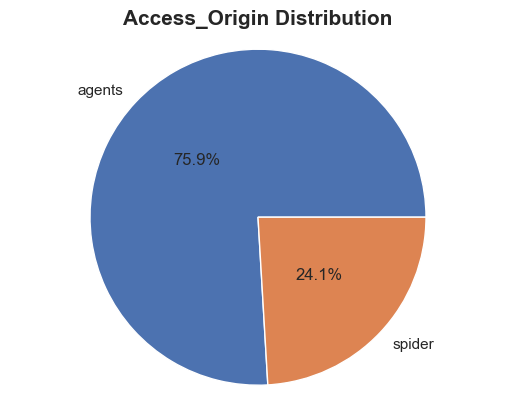

In [32]:
x = (data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100).values
y = (data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100).index

plt.pie(x,labels= y,radius=1.5,  autopct='%1.1f%%', pctdistance=0.5 )
plt.title(f'Access_Origin Distribution', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

In [33]:
data

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

In [34]:
data.groupby("Language").mean()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-0

In [35]:
pd.set_option('display.max_rows', 500)

In [36]:
aggregated_data = data.groupby("Language").mean().T.drop("Unknown_Language",axis = 1).reset_index()

In [37]:
aggregated_data["index"] = pd.to_datetime(aggregated_data["index"])
aggregated_data = aggregated_data.set_index("index")

In [38]:
aggregated_data

Language,Chinese,English,French,German,Japenese,Russian,Spanish
index,,,,,,,
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919
2015-07-02,240.941958,3502.511407,478.202000,705.229741,666.672801,640.902876,1037.814557
2015-07-03,239.344071,3325.357889,459.837659,676.877231,602.289805,594.026295,954.412680
2015-07-04,241.653491,3462.054256,491.508932,621.145145,756.509177,558.728132,896.050750
2015-07-05,257.779674,3575.520035,482.557746,722.076185,725.720914,595.029157,974.508210
...,...,...,...,...,...,...,...
2016-12-27,376.019618,6040.680728,858.413100,1085.095379,789.158680,1001.209426,1133.367901
2016-12-28,378.048639,5860.227559,774.155769,1032.640804,790.500465,931.987685,1178.290923
2016-12-29,350.719427,6245.127510,752.712954,994.657141,865.483236,897.282452,1112.171085


In [39]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chinese   550 non-null    float64
 1   English   550 non-null    float64
 2   French    550 non-null    float64
 3   German    550 non-null    float64
 4   Japenese  550 non-null    float64
 5   Russian   550 non-null    float64
 6   Spanish   550 non-null    float64
dtypes: float64(7)
memory usage: 34.4 KB


In [40]:
aggregated_data.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'], dtype='datetime64[ns]', name='index', length=550, freq=None)

# Visualising Time Series for each languages

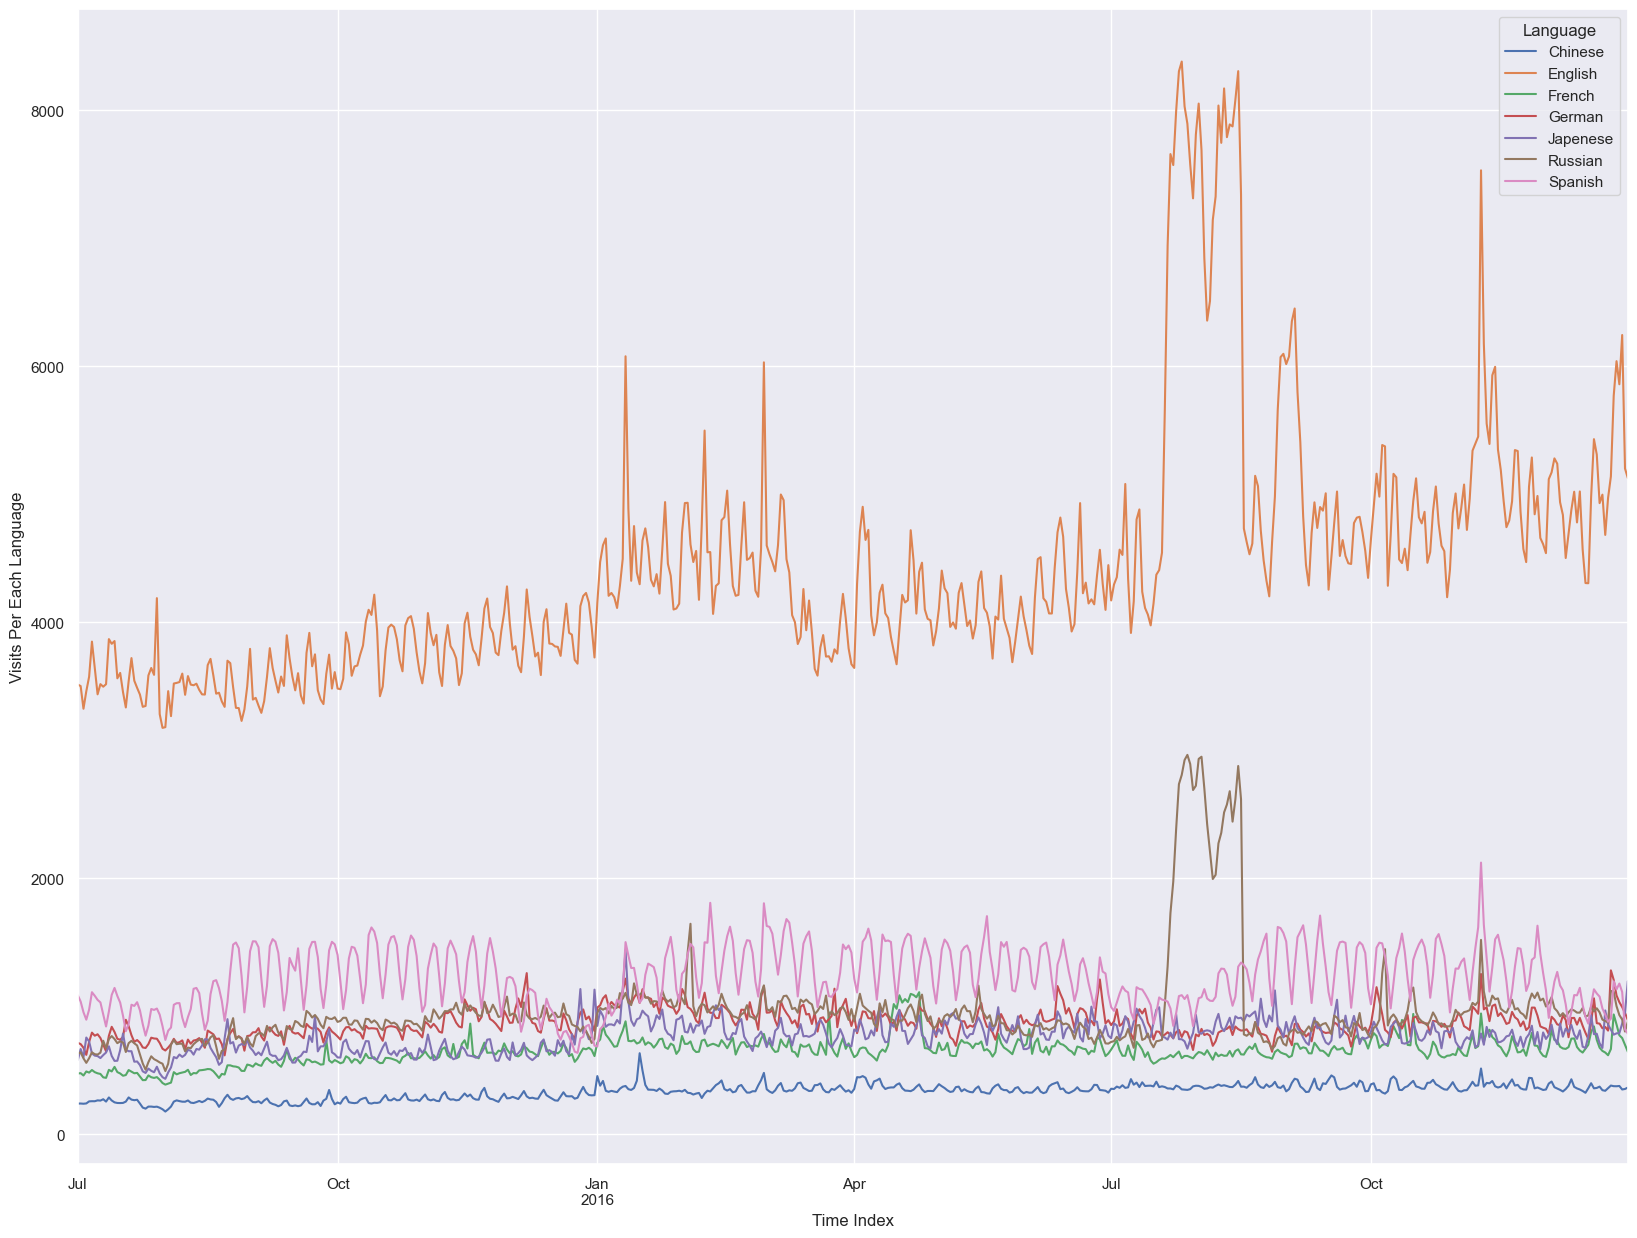

In [41]:
plt.rcParams['figure.figsize'] = (20, 15)

aggregated_data.plot()

plt.xlabel("Time Index")
plt.ylabel("Visits Per Each Language")
plt.show()

## Hypothesis Testing : if Time Series is Stationary or Trending

Null Hypothesis: The series is Non-Stationary

Alternative Hypothesis: The series is Stationary

significant value : 0.05 (alpha)

if p-value > 0.05 : we failed to reject Null hypothesis:

That means the series is Non-Stationart
if p-value <= 0.05: we reject Null Hypothesis

that means the time series in Stationary

In [42]:
import statsmodels.api as sm

In [43]:
def Dickey_Fuller_test(ts,significances_level = 0.05):
    p_value = sm.tsa.stattools.adfuller(ts)[1]
    if p_value <= significances_level:
        print("Time Series is Stationary")
    else:
        print("Time Series is NOT Stationary")
    print("P_value is: ", p_value)

In [44]:
for Language in aggregated_data.columns:
  print(Language)
  print(Dickey_Fuller_test(aggregated_data[Language],significances_level = 0.05))
  print()
  print()

Chinese
Time Series is NOT Stationary
P_value is:  0.44744579229311354
None


English
Time Series is NOT Stationary
P_value is:  0.18953359279992427
None


French
Time Series is NOT Stationary
P_value is:  0.05149502195245779
None


German
Time Series is NOT Stationary
P_value is:  0.14097382319729113
None


Japenese
Time Series is NOT Stationary
P_value is:  0.10257133898557619
None


Russian
Time Series is Stationary
P_value is:  0.0018649376536617962
None


Spanish
Time Series is Stationary
P_value is:  0.033588590844791315
None




Based on DickeyFuller test of Stationarity , we can observe Spanish and Russian languages Pages visits Time series are stationary.

Chinese, English , German , Japanese and French are not stationary.

In [45]:
TS_English = aggregated_data.English

In [46]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    
    dftest = sm.tsa.stattools.adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
       df_output['Critical Value (%s)' %key] = value
    print (df_output)

In [47]:
adf_test(TS_English)

Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


In [48]:
Dickey_Fuller_test(TS_English)

Time Series is NOT Stationary
P_value is:  0.18953359279992427


## Visualising English-Language Page Visits Time Series manually to identify seasonality and period

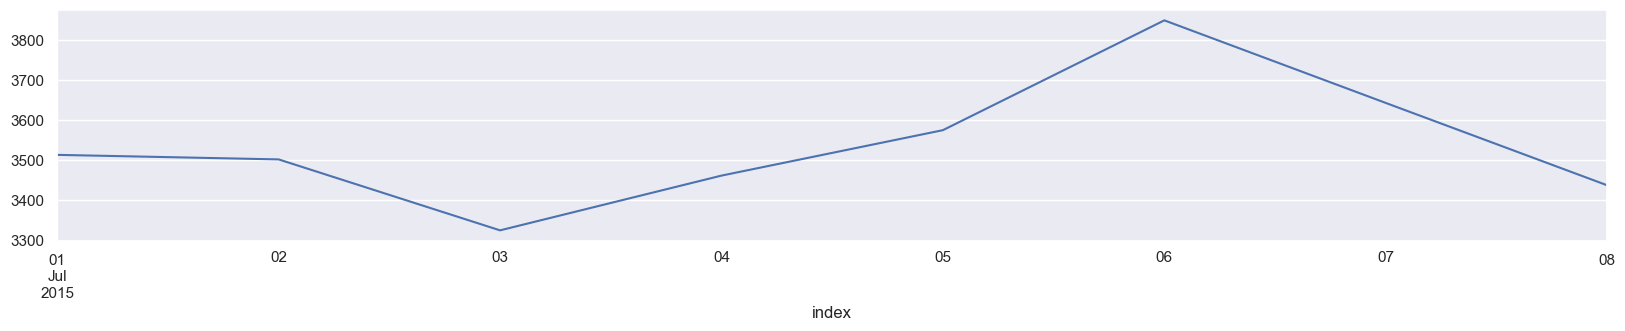

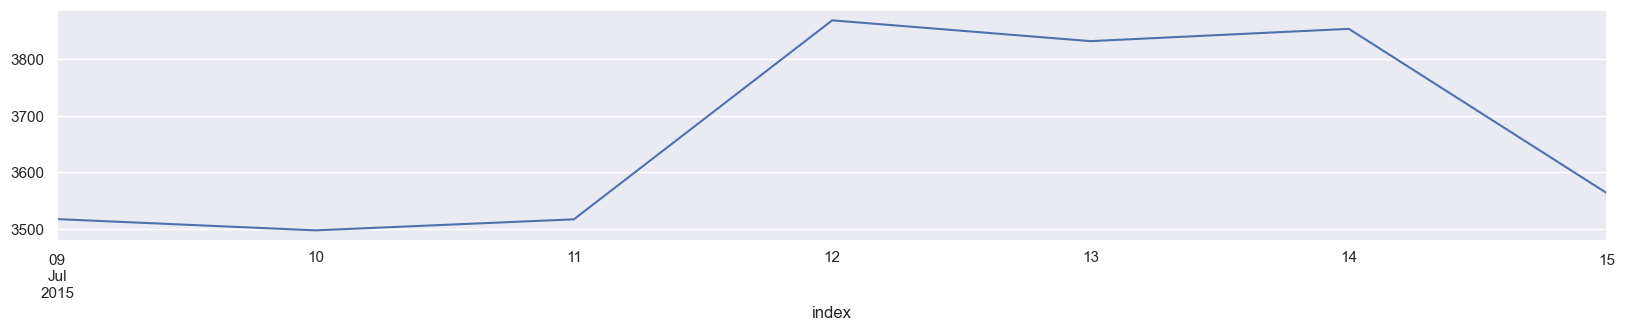

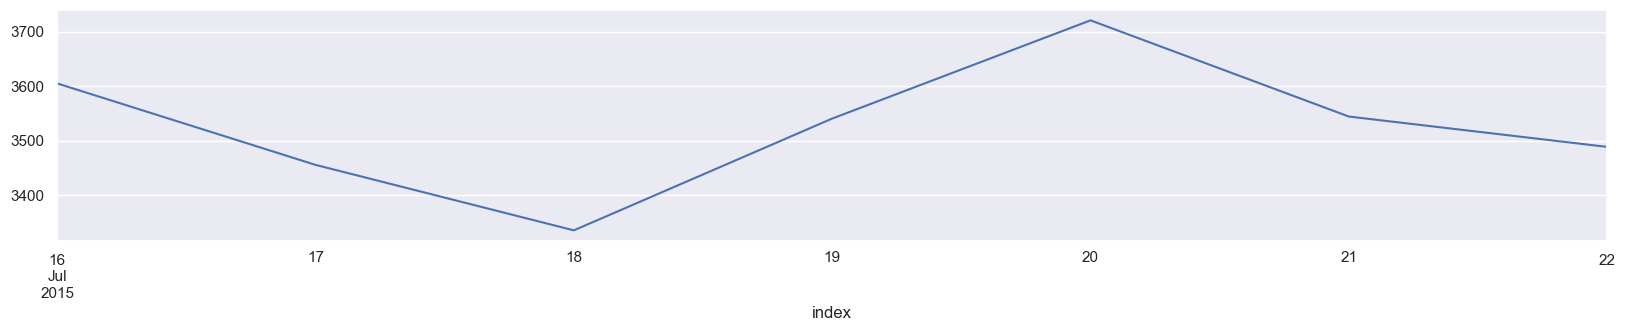

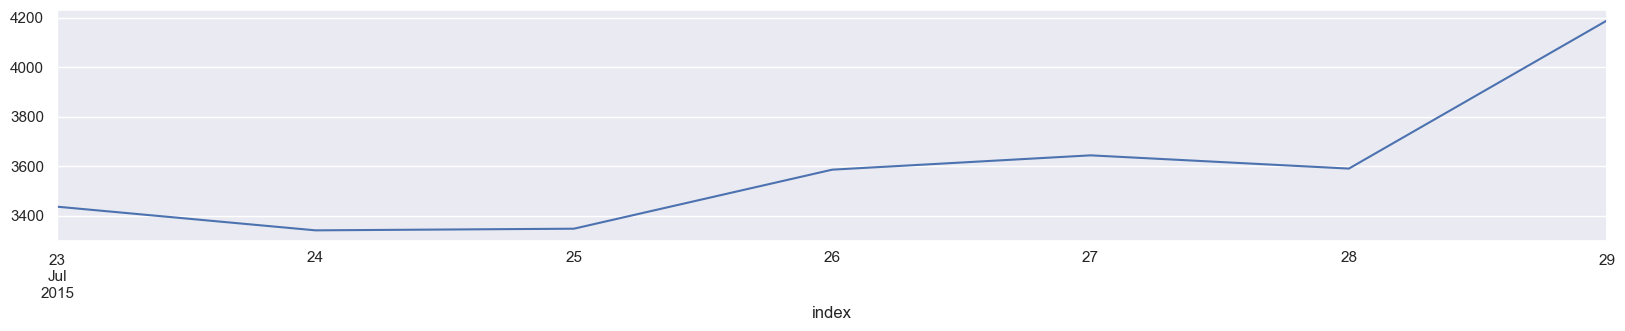

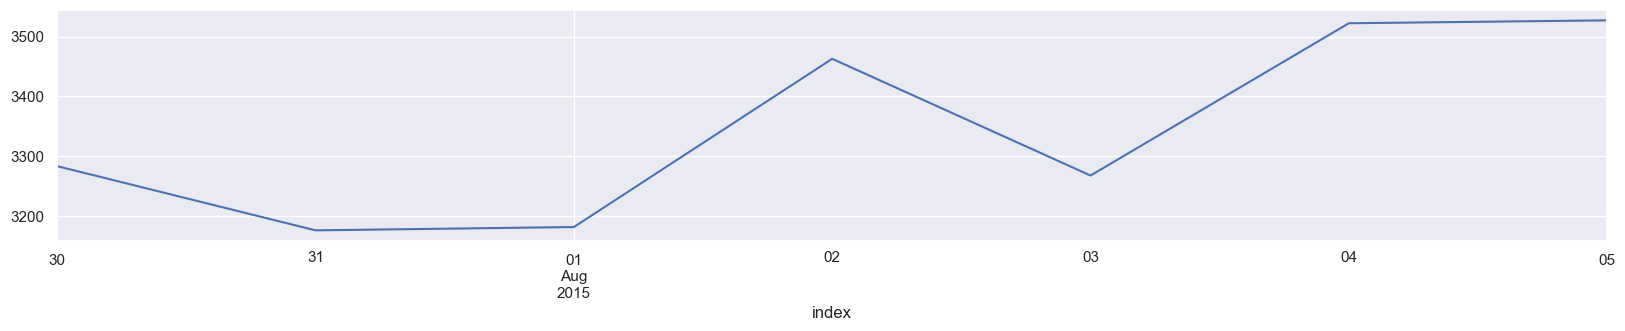

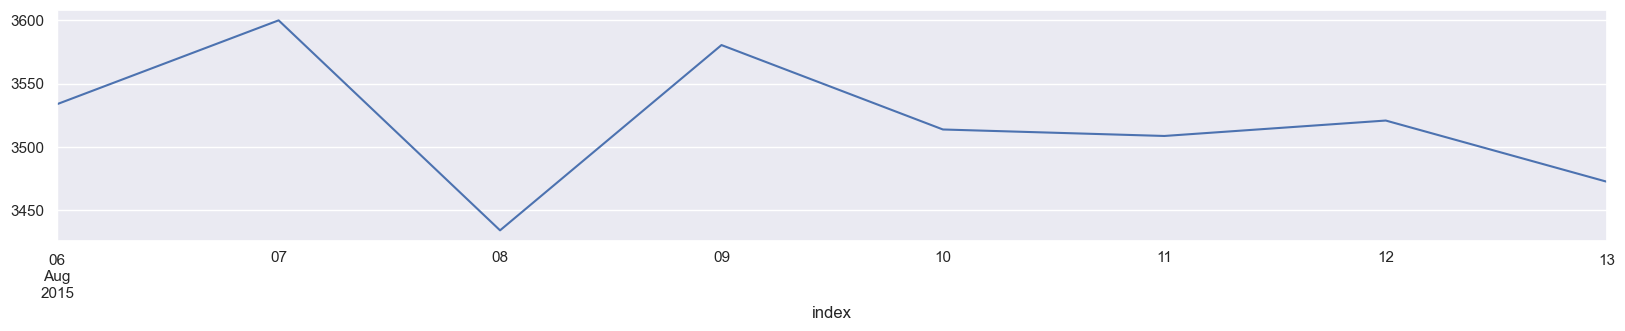

In [49]:
plt.rcParams['figure.figsize'] = (20, 3)

TS_English[:8].plot()
plt.show()
TS_English[8:15].plot()
plt.show()
TS_English[15:22].plot()
plt.show()
TS_English[22:29].plot()
plt.show()
TS_English[29:36].plot()
plt.show()

TS_English[36:44].plot()
plt.show()

In [50]:
correlations = []
for lag in range(1,30):
    present = TS_English[:-lag]
    past = TS_English.shift(-lag)[:-lag]
    corrs = np.corrcoef(present,past)[0][-1]
    print(lag,corrs)
    correlations.append(corrs)

1 0.9363434527458436
2 0.8682966716039893
3 0.8185418037184543
4 0.7846718829500339
5 0.7612561076942569
6 0.7542260641783564
7 0.7386829287516696
8 0.6912638018189879
9 0.6370978014300408
10 0.6015277501876304
11 0.5825450402423569
12 0.5812931934793543
13 0.600726646281779
14 0.6142525351445116
15 0.5971084554755529
16 0.5693834937428246
17 0.5488401467532629
18 0.5377431132136109
19 0.54308167434112
20 0.5552694244923041
21 0.5540623423718064
22 0.5092655604869362
23 0.45373695576813594
24 0.41123362976203237
25 0.3816286061625173
26 0.36519963166994807
27 0.37236036273026013
28 0.37818226683160044
29 0.35939242667328164


## Time Series Decomposition

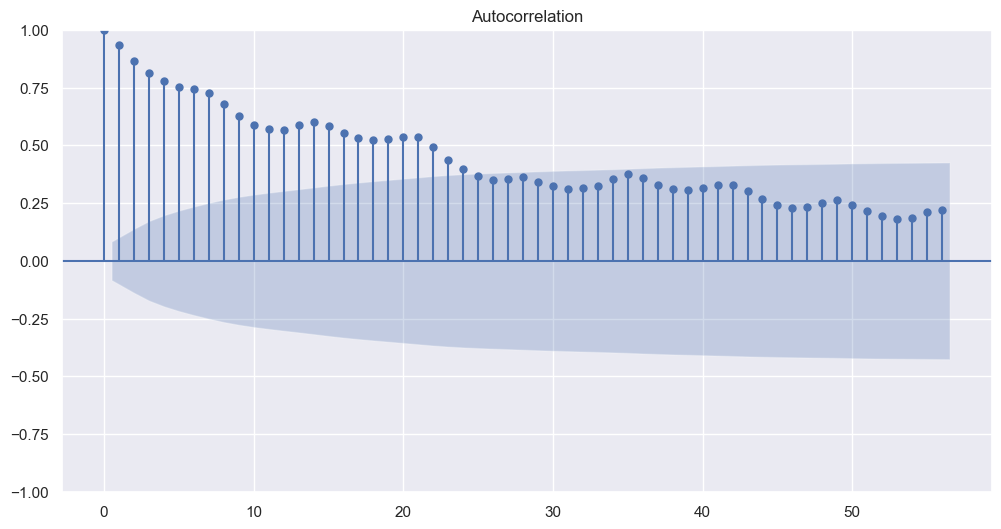

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.rcParams['figure.figsize'] = (12, 6)
plot_acf(TS_English,lags=56);

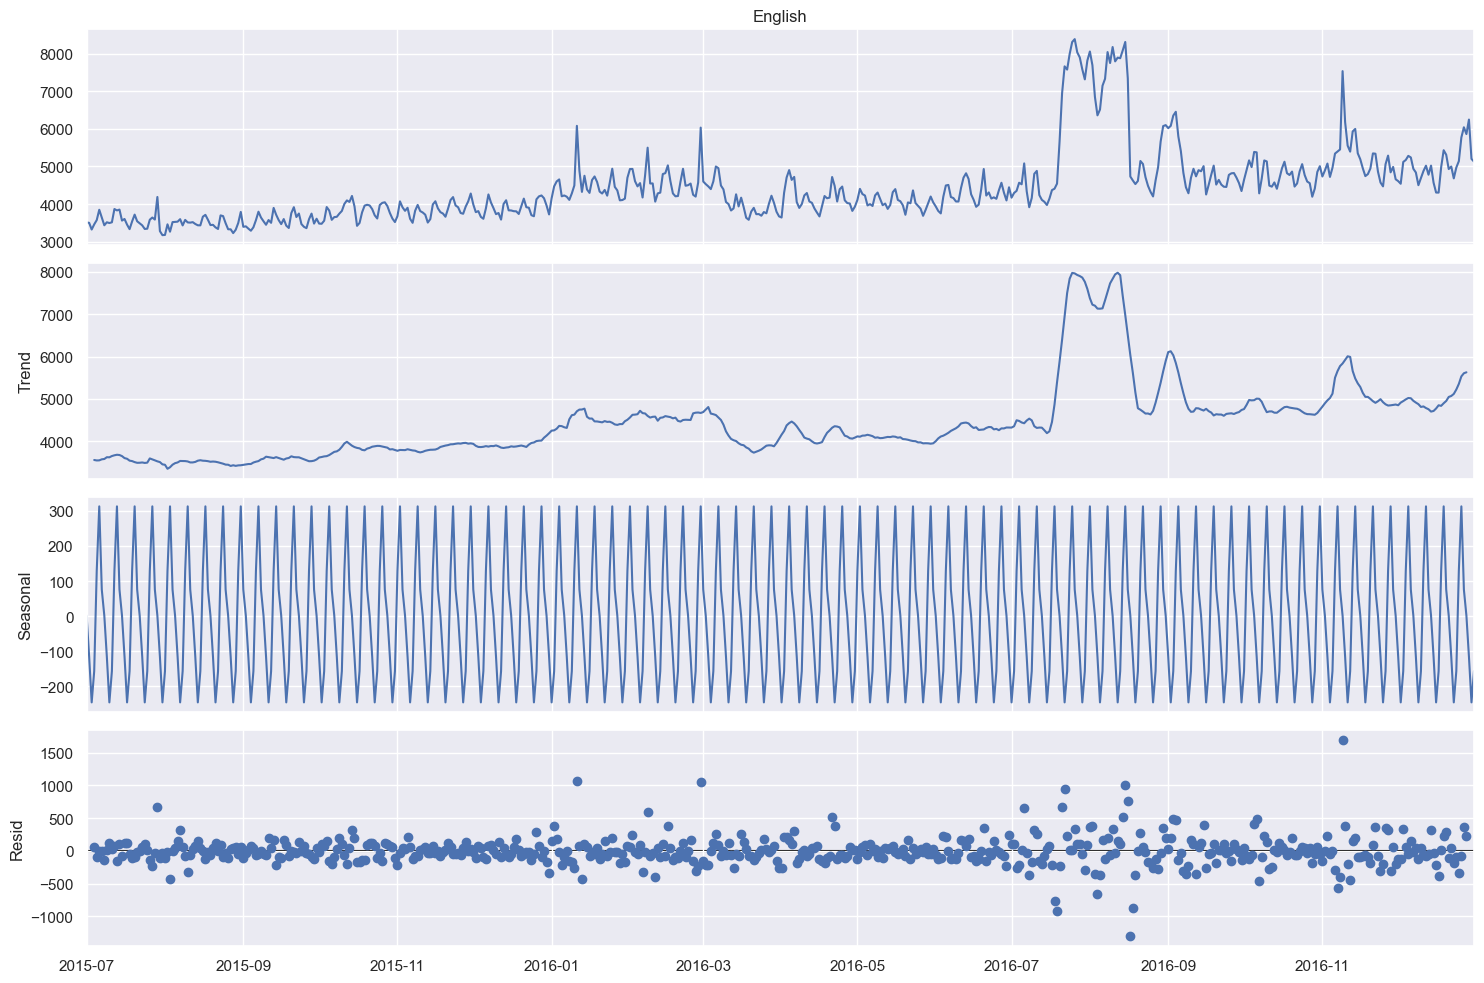

In [52]:
plt.rcParams['figure.figsize'] = (15, 10)

Decomposition_model = sm.tsa.seasonal_decompose(TS_English, model='additive',period=7)
Decomposition_model.plot();

In [53]:
Dickey_Fuller_test(pd.Series(Decomposition_model.resid).fillna(0))

Time Series is Stationary
P_value is:  3.727526947813056e-21


<Axes: xlabel='index'>

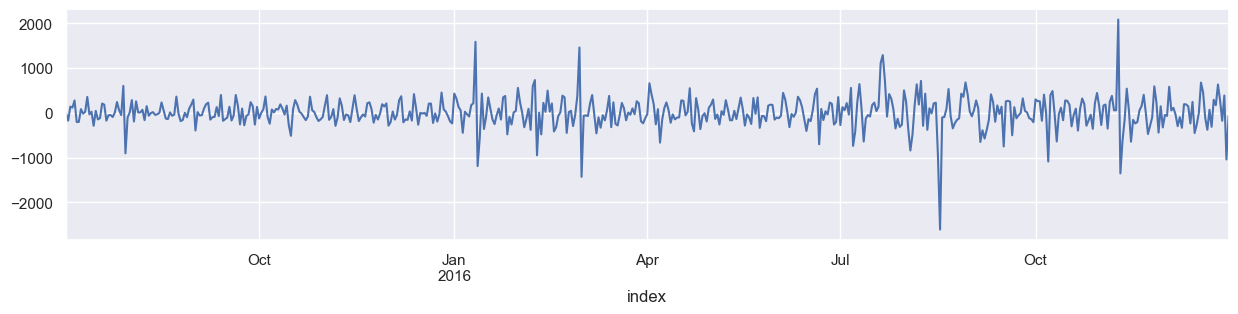

In [54]:
plt.rcParams['figure.figsize'] = (15, 3)

TS_English.diff(1).dropna().plot()

In [55]:
Dickey_Fuller_test(TS_English.diff(1).dropna())

Time Series is Stationary
P_value is:  5.292474635436038e-13


In [56]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

# Forecasting

## Exponential Smoothing Method

C:\Users\senth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\senth\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='index'>

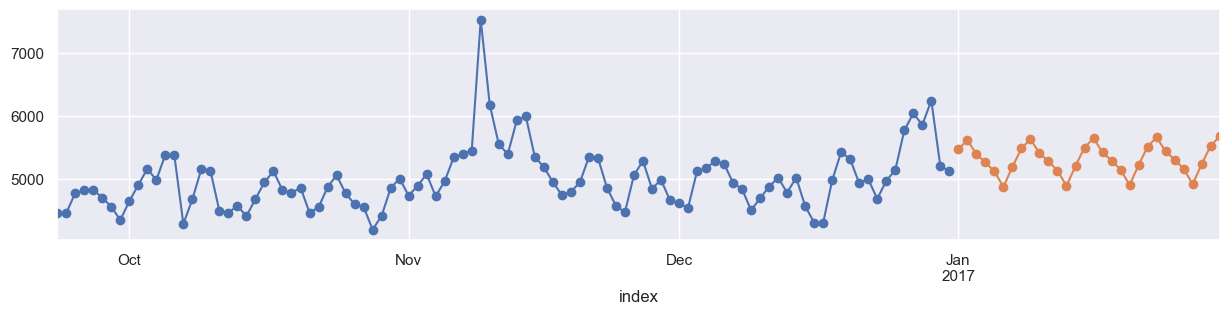

In [57]:
model = sm.tsa.ExponentialSmoothing(TS_English, seasonal='add',trend="add")
model = model.fit()
                                                    

    
TS_English.tail(100).plot(style='-o', label='actual')
model.forecast(30).plot(style='-o', label='predicted')

MAE : 394.978
RMSE : 563.352
MAPE: 0.073


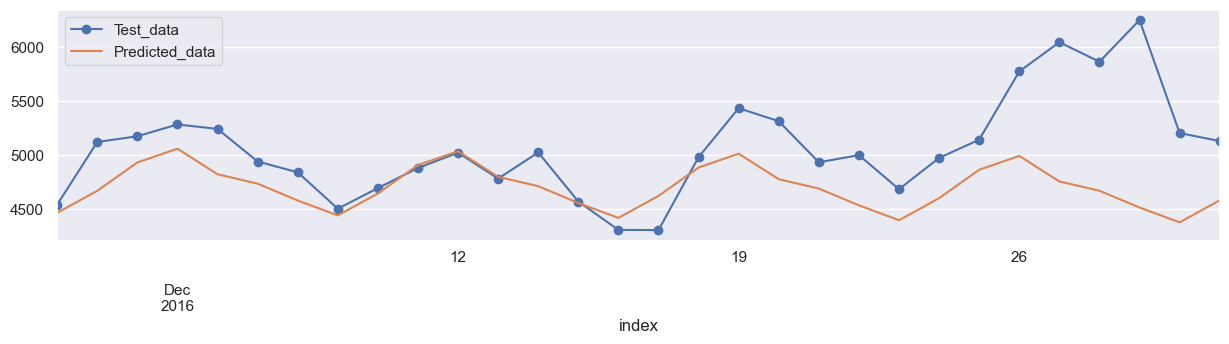

In [58]:
X_train = TS_English.loc[TS_English.index < TS_English.index[-30] ].copy()
X_test = TS_English.loc[TS_English.index >= TS_English.index[-30] ].copy()

import warnings # supress warnings
warnings.filterwarnings('ignore')


model = sm.tsa.ExponentialSmoothing(X_train,
                                    trend="add",
                                    damped_trend="add",
                                    seasonal="add")
model = model.fit(smoothing_level=None,    # alpha
            smoothing_trend=None,          # beta
            smoothing_seasonal=None)       # gama)

# X_test.plot()
Pred = model.forecast(steps=30)
performance(X_test,Pred)

X_test.plot(style="-o",label ="Test_data")
Pred.plot(label="Predicted_data")
plt.legend()
plt.show()

## ARIMA

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [60]:
TS = TS_English.copy(deep=True)

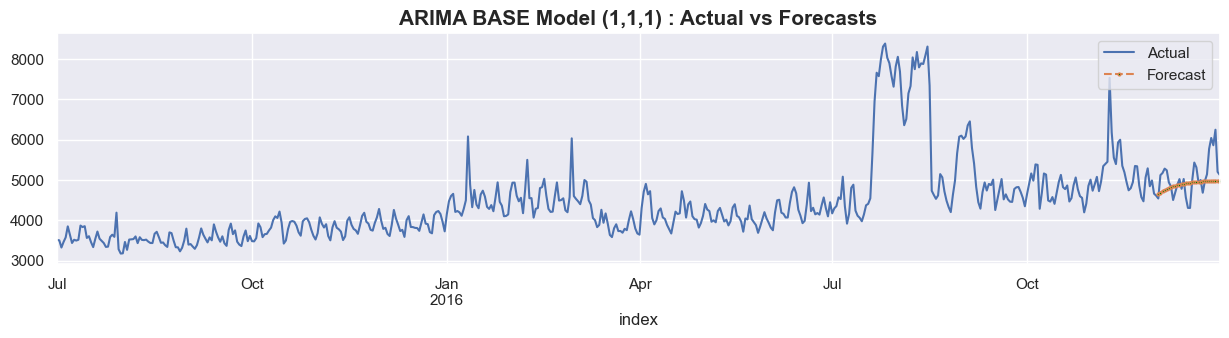


MAPE of Model : 0.06585
RMSE of Model : 472.186


In [61]:
n_forecast = 30


model = ARIMA(TS[:-n_forecast],
              order = (1,1,1))
model = model.fit()

predicted = model.forecast(steps= n_forecast, alpha = 0.05)


TS.plot(label = 'Actual')
predicted.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='green', markersize=2)
plt.legend(loc="upper right")
plt.title('ARIMA BASE Model (1,1,1) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()


#Calculating MAPE & RMSE
actuals = TS.values[-n_forecast:]
errors = TS.values[-n_forecast:] - predicted.values

mape = np.mean(np.abs(errors)/ np.abs(actuals))
rmse = np.sqrt(np.mean(errors**2))

print()
print(f'MAPE of Model : {np.round(mape,5)}')

print(f'RMSE of Model : {np.round(rmse,3)}')

## SARIMAX model

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):
    
    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s) 
    model = SARIMAX(time_series[:-n], \
                    order =(p,d,q), 
                    seasonal_order=(P, D, Q, s), 
                    exog = exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()
    
    #Creating forecast for last n-values
    model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))
    
    #plotting Actual & Forecasted values
    
    plt.figure(figsize = (20,8))
    time_series[-60:].plot(label = 'Actual')
    model_forecast[-60:].plot(label = 'Forecast', color = 'red', 
                              linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
    plt.show()
    
    #Calculating MAPE & RMSE
    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors)/ np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    print()
    print(f'MAPE of Model : {np.round(mape,5)}')
    print(f'RMSE of Model : {np.round(rmse,3)}')

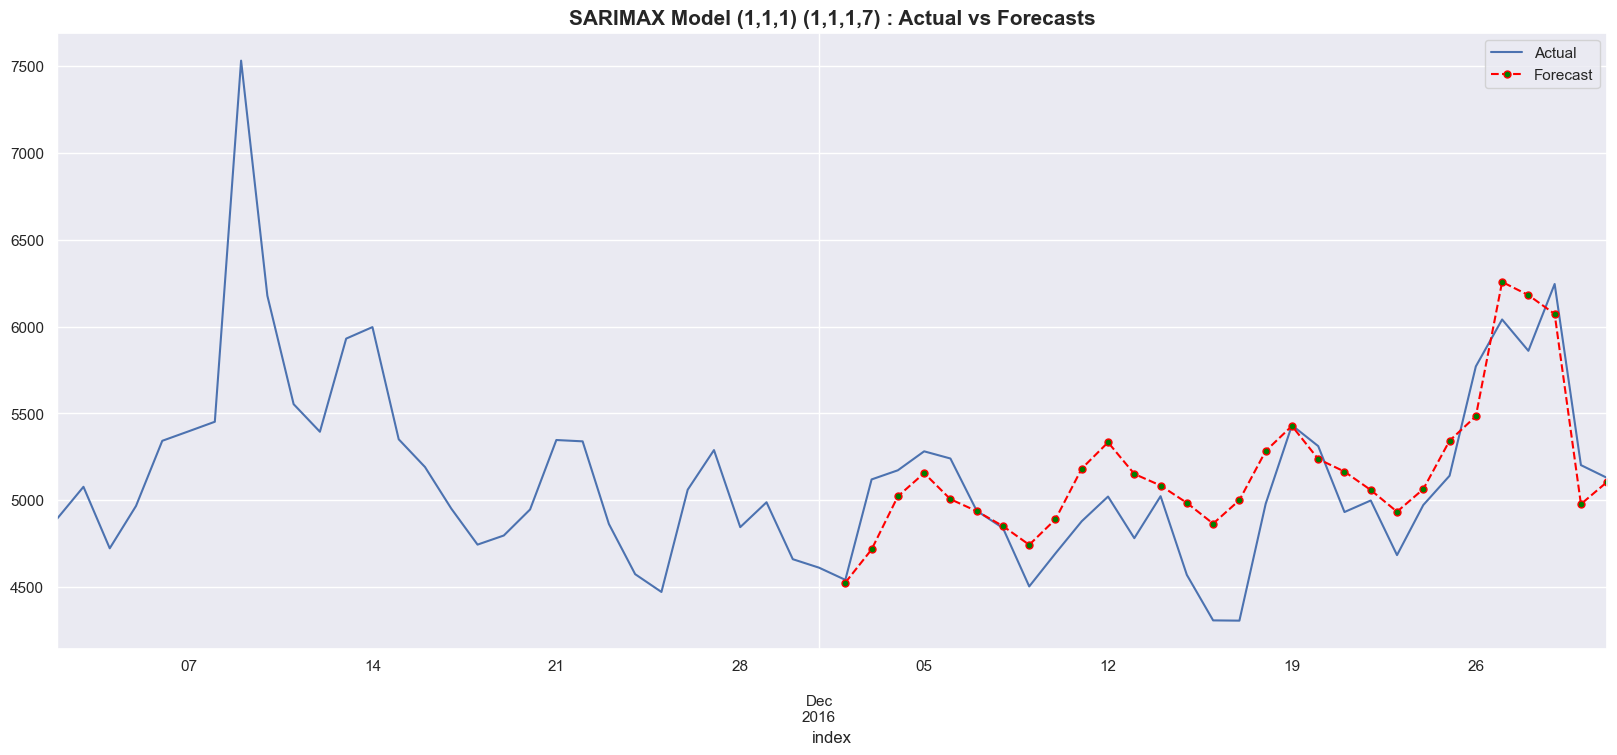


MAPE of Model : 0.04449
RMSE of Model : 272.497


In [64]:
exog = Exog_Campaign_eng['Exog'].to_numpy()
time_series = aggregated_data.English
test_size= 0.1
p,d,q, P,D,Q,s = 1,1,1,1,1,1,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

## Hyperparameter tuning for SARIMAX model

In [65]:
def SARIMAX_grid_search(time_series, n, param, d_param, s_param, exog = []):
    counter = 0
    #creating df for storing results summary
    param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])
    
    #Creating loop for every paramater to fit SARIMAX model
    for p in param:
        for d in d_param:
            for q in param:
                for P in param:
                    for D in d_param:
                        for Q in param:
                            for s in s_param:
                                #Creating Model
                                model = SARIMAX(time_series[:-n], 
                                                order=(p,d,q), 
                                                seasonal_order=(P, D, Q, s), 
                                                exog = exog[:-n],
                                                initialization='approximate_diffuse')
                                model_fit = model.fit()
                                
                                #Creating forecast from Model
                                model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))
                                
                                #Calculating errors for results
                                actuals = time_series.values[-n:]
                                errors = time_series.values[-n:] - model_forecast.values
                                
                                #Calculating MAPE & RMSE
                                mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                rmse = np.sqrt(np.mean(errors**2))
                                mape = np.round(mape,5)
                                rmse = np.round(rmse,3)
                                
                                #Storing the results in param_df
                                counter += 1
                                list_row = [counter, (p,d,q), (P,D,Q,s), mape, rmse]
                                param_df.loc[len(param_df)] = list_row
                                
                #print statement to check progress of Loop                
                print(f'Possible Combination: {counter} out of { (len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')
                           
    return param_df

In [66]:
exog = Exog_Campaign_eng['Exog'].to_numpy()
time_series = aggregated_data.English
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]

english_params  = SARIMAX_grid_search(time_series, n, param, d_param,s_param, exog)

Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculated
Possible Combination: 324 out of 324 calculated


In [67]:
english_params.sort_values(['mape', 'rmse']).head()

,serial,pdq,PDQs,mape,rmse
209,210,"(1, 1, 2)","(1, 1, 2, 7)",0.04014,242.824
317,318,"(2, 1, 2)","(1, 1, 2, 7)",0.04045,247.862
323,324,"(2, 1, 2)","(2, 1, 2, 7)",0.04127,252.235
40,41,"(0, 0, 2)","(0, 1, 1, 7)",0.04199,276.311
41,42,"(0, 0, 2)","(0, 1, 2, 7)",0.04206,271.577


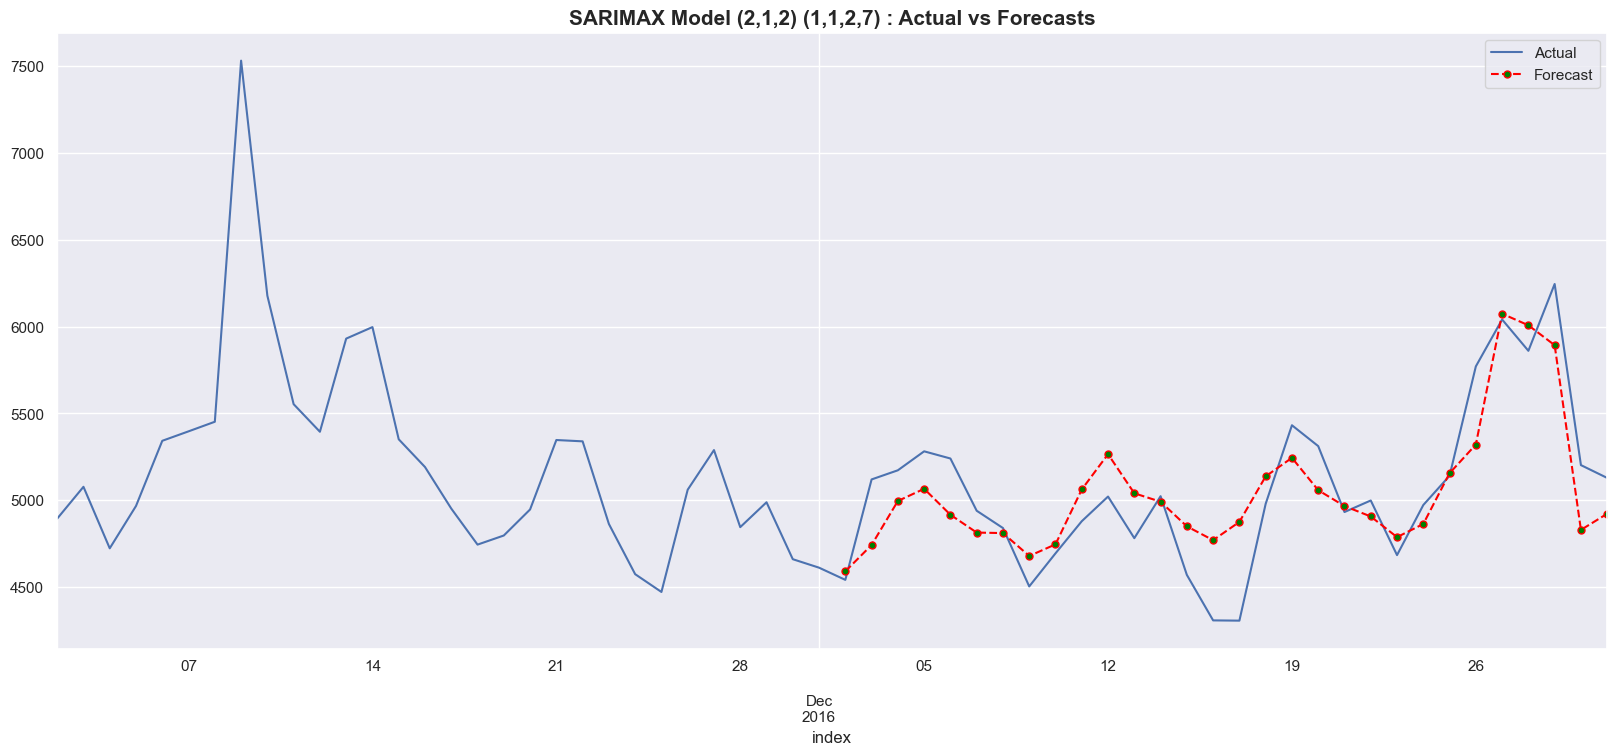


MAPE of Model : 0.04045
RMSE of Model : 247.862


In [68]:
exog = Exog_Campaign_eng['Exog'].to_numpy()
time_series = aggregated_data.English
test_size= 0.1
p,d,q, P,D,Q,s = 2,1,2,1,1,2,7
n = 30
sarimax_model(time_series, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

## Hyperparameter tuning for all other languages

In [69]:
def pipeline_sarimax_grid_search_without_exog(languages, data, n, param, d_param, s_param):
    
    best_param_df  = pd.DataFrame(columns = ['language','p','d', 'q', 'P','D','Q','s','mape'])
    for lang in languages:
        print('')
        print('')
        print(f'--------------------------------------------------------------')
        print(f'          Finding best parameters for {lang}                  ')
        print(f'--------------------------------------------------------------')
        counter = 0
        time_series = data[lang]
        best_mape = 100
        
        #Creating loop for every paramater to fit SARIMAX model
        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    #Creating Model
                                    model = SARIMAX(time_series[:-n], 
                                                    order=(p,d,q), 
                                                    seasonal_order=(P, D, Q, s), 
                                                    initialization='approximate_diffuse')
                                    model_fit = model.fit()

                                    #Creating forecast from Model
                                    model_forecast = model_fit.forecast(n, dynamic = True)

                                    #Calculating errors for results
                                    actuals = time_series.values[-n:]
                                    errors = time_series.values[-n:] - model_forecast.values

                                    #Calculating MAPE & RMSE
                                    mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                    
                                    counter += 1

                                    if (mape < best_mape):
                                        best_mape = mape
                                        best_p = p
                                        best_d = d
                                        best_q = q
                                        best_P = P
                                        best_D = D
                                        best_Q = Q
                                        best_s = s
                                    else: pass

                    #print statement to check progress of Loop                
                    print(f'Possible Combination: {counter} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

        best_mape = np.round(best_mape, 5)
        print(f'--------------------------------------------------------------')
        print(f'Minimum MAPE for {lang} = {best_mape}')
        print(f'Corresponding Best Parameters are {best_p , best_d, best_q, best_P, best_D, best_Q, best_s}')
        print(f'--------------------------------------------------------------')
        
        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
        best_param_df.loc[len(best_param_df)] = best_param_row                
                           
    return best_param_df

In [70]:
languages = aggregated_data.columns
n = 30 
param = [0,1,2]
d_param = [0,1]
s_param = [7]


best_param_df = pipeline_sarimax_grid_search_without_exog(languages, aggregated_data, n, param, d_param, s_param)



--------------------------------------------------------------
          Finding best parameters for Chinese                  
--------------------------------------------------------------
Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculat

Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculated
Possible Combination: 324 out of 324 calculated
--------------------------------------------------------------
Minimum MAPE for Spanish = 0.08561
Corresponding Best Parameters are (0, 1, 0, 2, 1, 0, 7)
--------------------------------------------------------------


In [71]:
best_param_df.sort_values(['mape'], inplace = True)
best_param_df

,language,p,d,q,P,D,Q,s,mape
0,Chinese,0,1,0,1,0,2,7,0.03074
5,Russian,0,0,2,1,0,2,7,0.04580
1,English,2,0,1,0,1,2,7,0.05264
2,French,0,0,2,2,1,2,7,0.06362
3,German,0,1,1,1,0,1,7,0.06578
4,Japenese,0,1,2,2,1,0,7,0.07122
6,Spanish,0,1,0,2,1,0,7,0.08561


In [72]:
def plot_best_SARIMAX_model(languages, data, n, best_param_df):
    
    for lang in languages:
        #fetching respective best parameters for that language
        p = best_param_df.loc[best_param_df['language'] == lang, ['p']].values[0][0]
        d = best_param_df.loc[best_param_df['language'] == lang, ['d']].values[0][0]
        q = best_param_df.loc[best_param_df['language'] == lang, ['q']].values[0][0]
        P = best_param_df.loc[best_param_df['language'] == lang, ['P']].values[0][0]
        D = best_param_df.loc[best_param_df['language'] == lang, ['D']].values[0][0]
        Q = best_param_df.loc[best_param_df['language'] == lang, ['Q']].values[0][0]
        s = best_param_df.loc[best_param_df['language'] == lang, ['s']].values[0][0]
        
        #Creating language time-series
        time_series = data[lang]
        
        #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s) 
        model = SARIMAX(time_series[:-n], 
                        order =(p,d,q), 
                        seasonal_order=(P, D, Q, s),
                        initialization='approximate_diffuse')
        model_fit = model.fit()
        
        #Creating forecast for last n-values
        model_forecast = model_fit.forecast(n, dynamic = True)
        
        #Calculating MAPE & RMSE
        actuals = time_series.values[-n:]
        errors = time_series.values[-n:] - model_forecast.values

        mape = np.mean(np.abs(errors)/ np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))
        
        print('')
        print('')
        print(f'-----------------------------------------------------------------------------------------')
        print(f'        SARIMAX model for {lang} Time Series                                             ')
        print(f'        Parameters of Model : ({p},{d},{q}) ({P},{D},{Q},{s})                            ')
        print(f'        MAPE of Model       : {np.round(mape,5)}                                         ')
        print(f'        RMSE of Model       : {np.round(rmse,3)}                                         ')
        print(f'-----------------------------------------------------------------------------------------')
        
        #plotting Actual & Forecasted values
        time_series.index = time_series.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize = (20,8))
        time_series[-60:].plot(label = 'Actual')
        model_forecast[-60:].plot(label = 'Forecast', color = 'red', 
                                  linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
        plt.legend(loc="upper right")
        plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
        plt.show()
    
    return 0



-----------------------------------------------------------------------------------------
        SARIMAX model for Chinese Time Series                                             
        Parameters of Model : (0,1,0) (1,0,2,7)                            
        MAPE of Model       : 0.03074                                         
        RMSE of Model       : 14.487                                         
-----------------------------------------------------------------------------------------


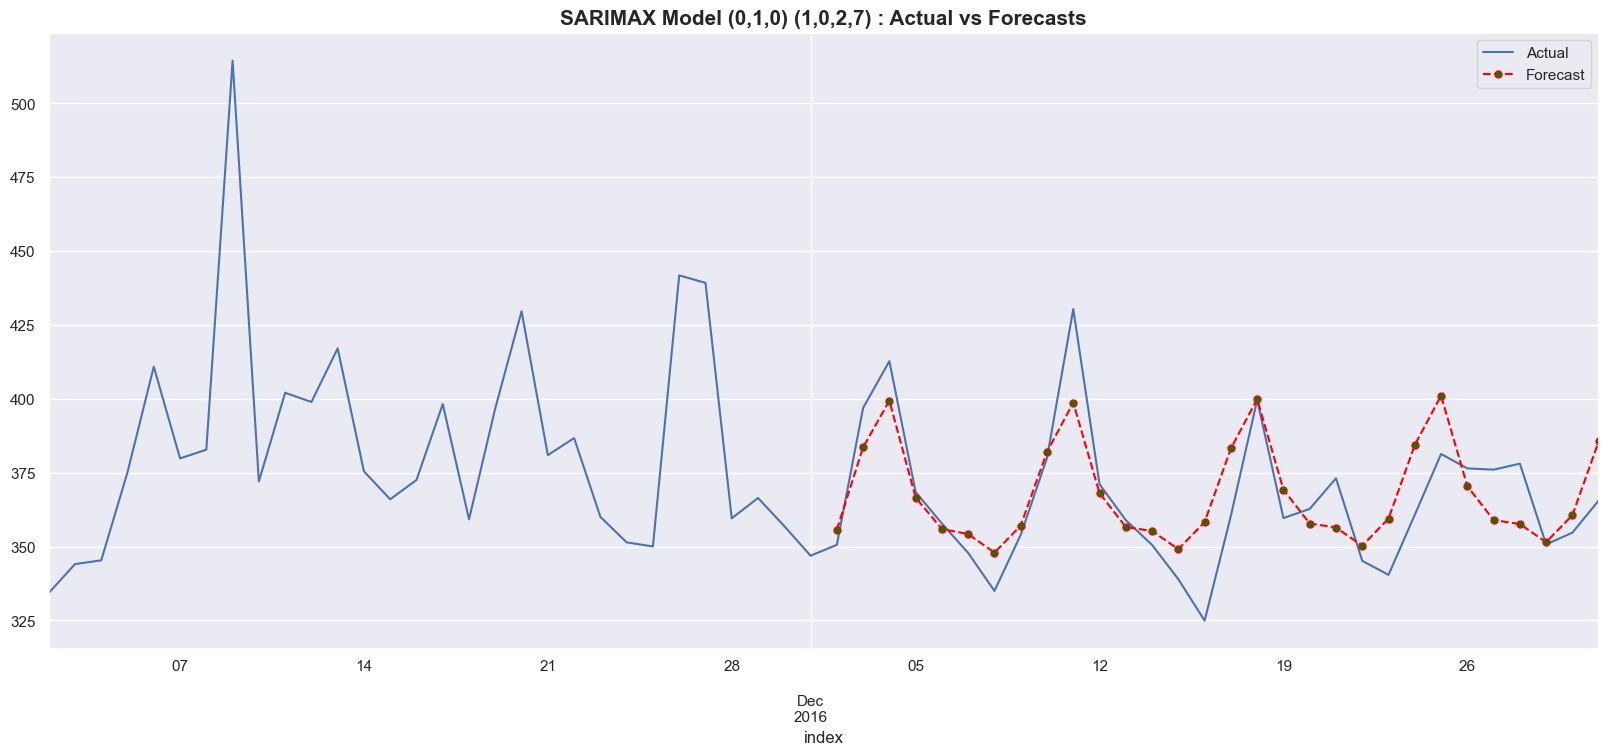



-----------------------------------------------------------------------------------------
        SARIMAX model for English Time Series                                             
        Parameters of Model : (2,0,1) (0,1,2,7)                            
        MAPE of Model       : 0.05264                                         
        RMSE of Model       : 390.016                                         
-----------------------------------------------------------------------------------------


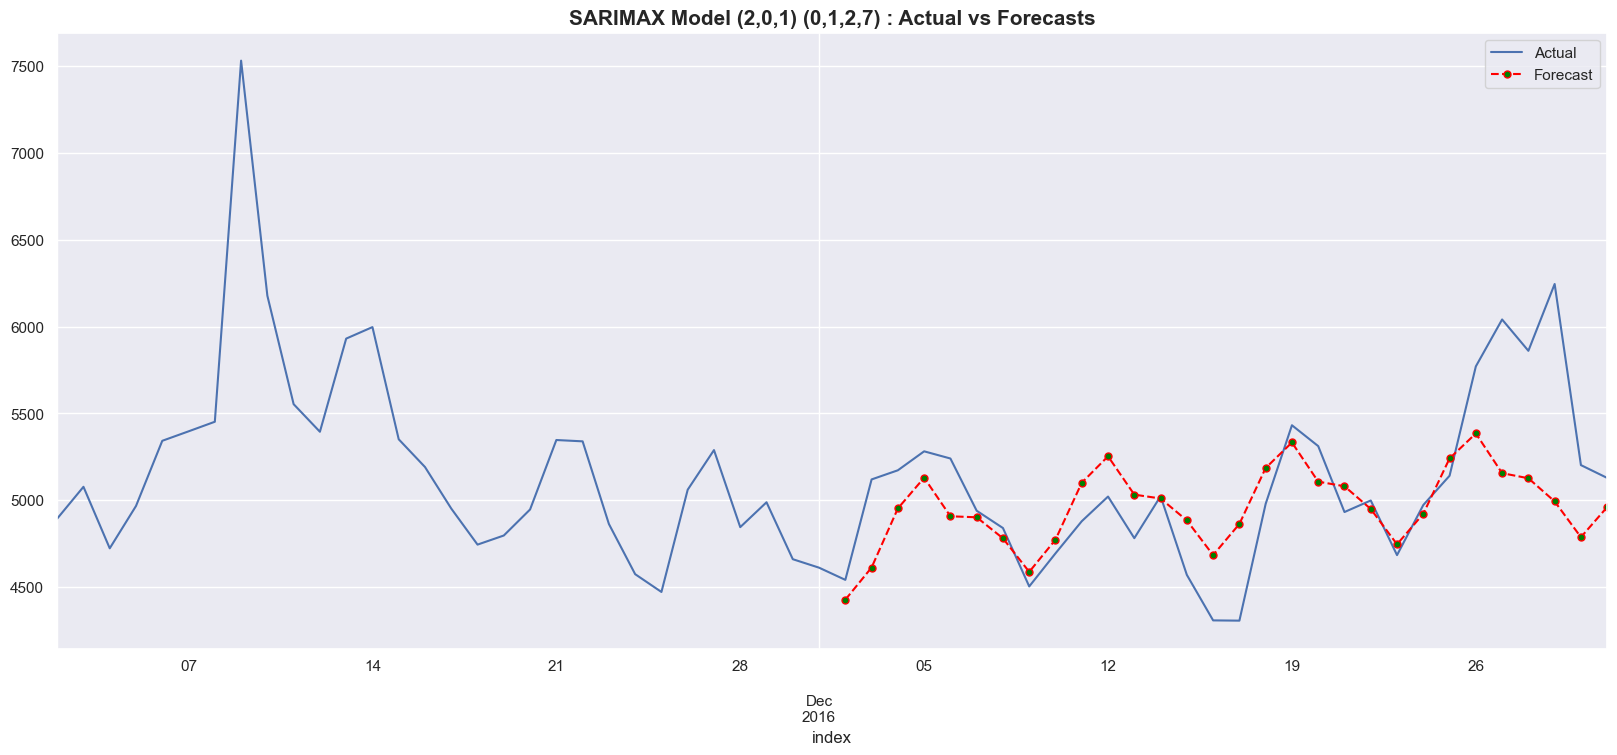



-----------------------------------------------------------------------------------------
        SARIMAX model for French Time Series                                             
        Parameters of Model : (0,0,2) (2,1,2,7)                            
        MAPE of Model       : 0.06362                                         
        RMSE of Model       : 72.605                                         
-----------------------------------------------------------------------------------------


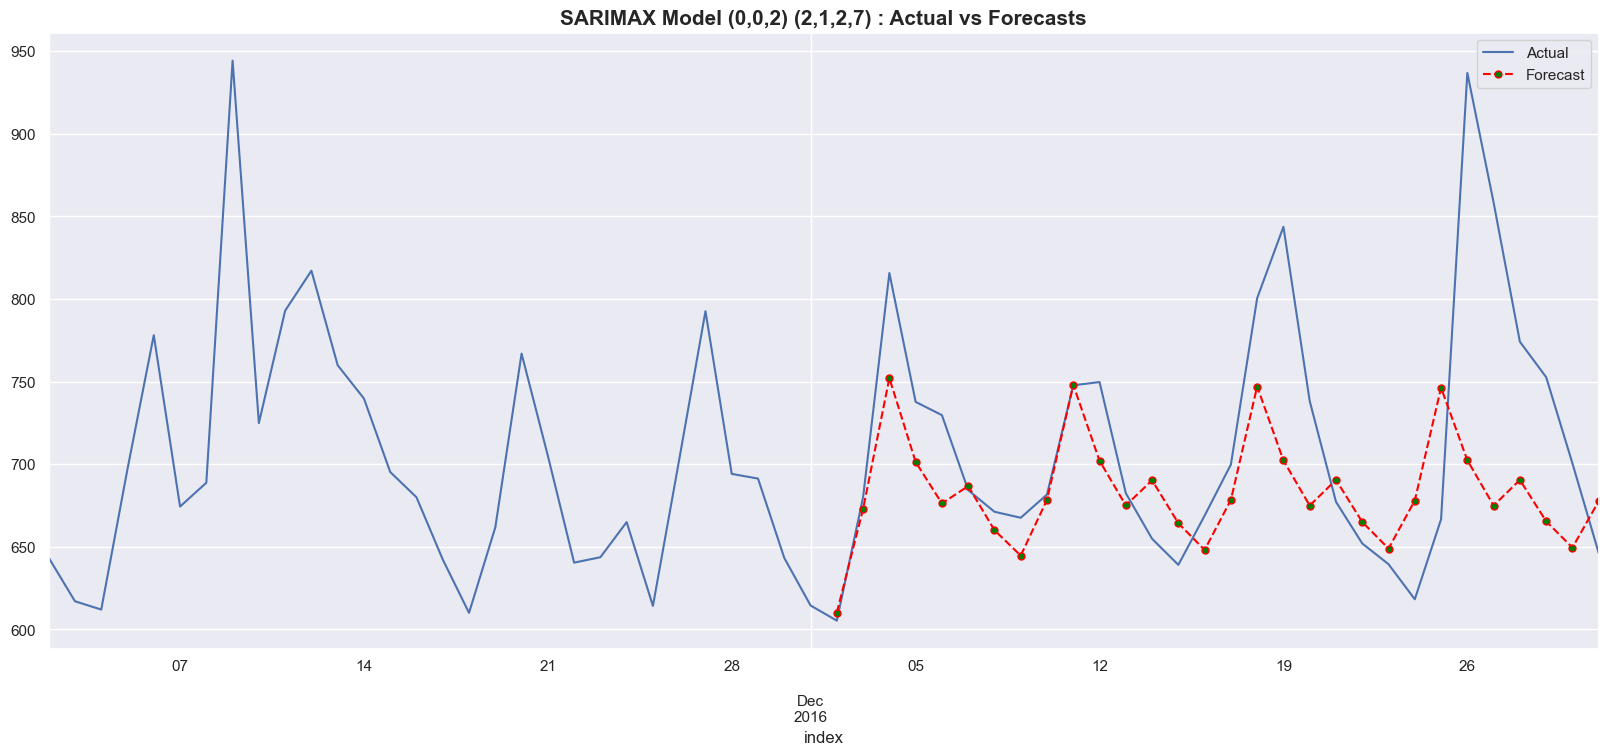



-----------------------------------------------------------------------------------------
        SARIMAX model for German Time Series                                             
        Parameters of Model : (0,1,1) (1,0,1,7)                            
        MAPE of Model       : 0.06578                                         
        RMSE of Model       : 110.617                                         
-----------------------------------------------------------------------------------------


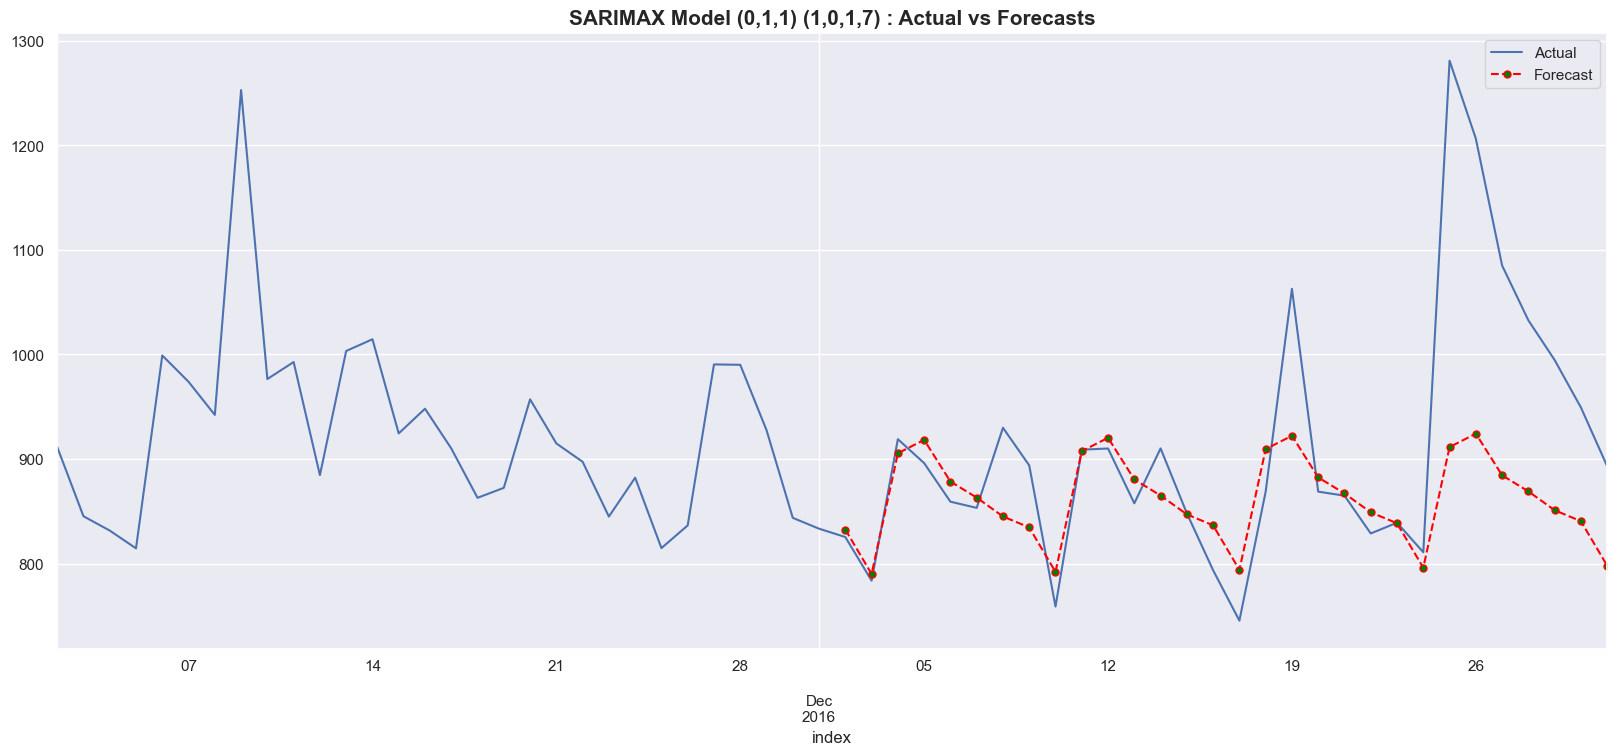



-----------------------------------------------------------------------------------------
        SARIMAX model for Japenese Time Series                                             
        Parameters of Model : (0,1,2) (2,1,0,7)                            
        MAPE of Model       : 0.07122                                         
        RMSE of Model       : 90.833                                         
-----------------------------------------------------------------------------------------


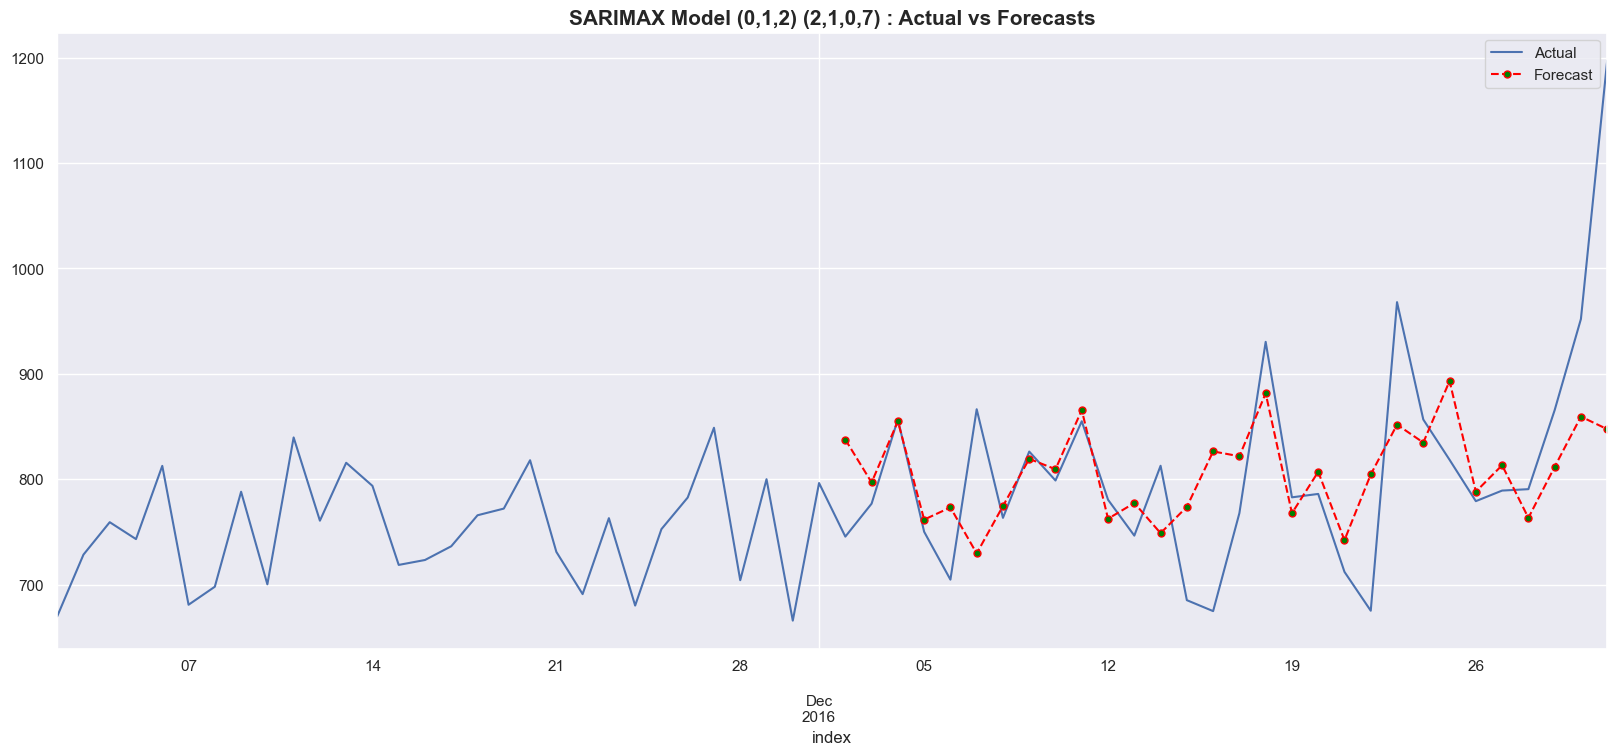



-----------------------------------------------------------------------------------------
        SARIMAX model for Russian Time Series                                             
        Parameters of Model : (0,0,2) (1,0,2,7)                            
        MAPE of Model       : 0.0458                                         
        RMSE of Model       : 54.07                                         
-----------------------------------------------------------------------------------------


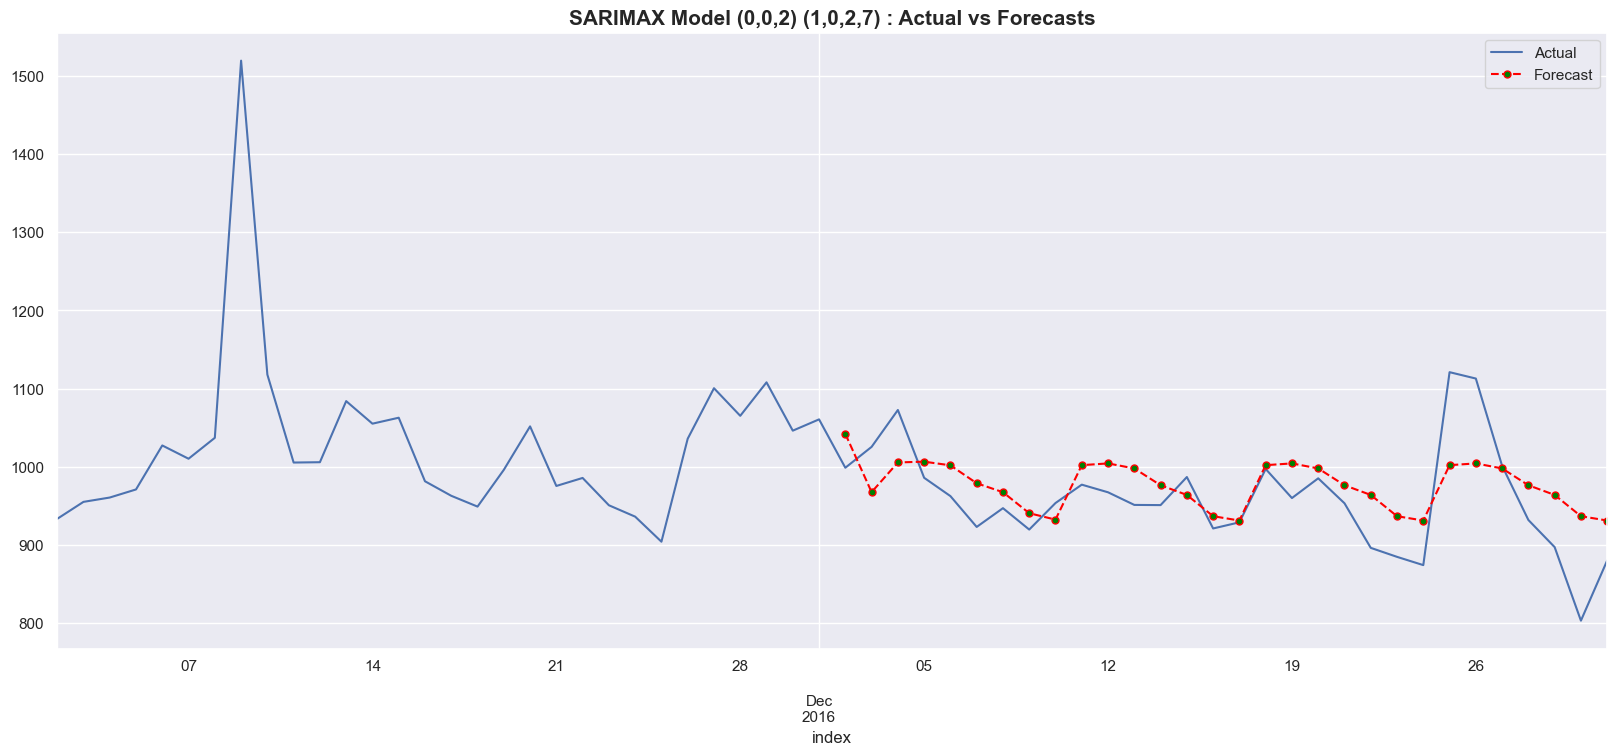



-----------------------------------------------------------------------------------------
        SARIMAX model for Spanish Time Series                                             
        Parameters of Model : (0,1,0) (2,1,0,7)                            
        MAPE of Model       : 0.08561                                         
        RMSE of Model       : 109.03                                         
-----------------------------------------------------------------------------------------


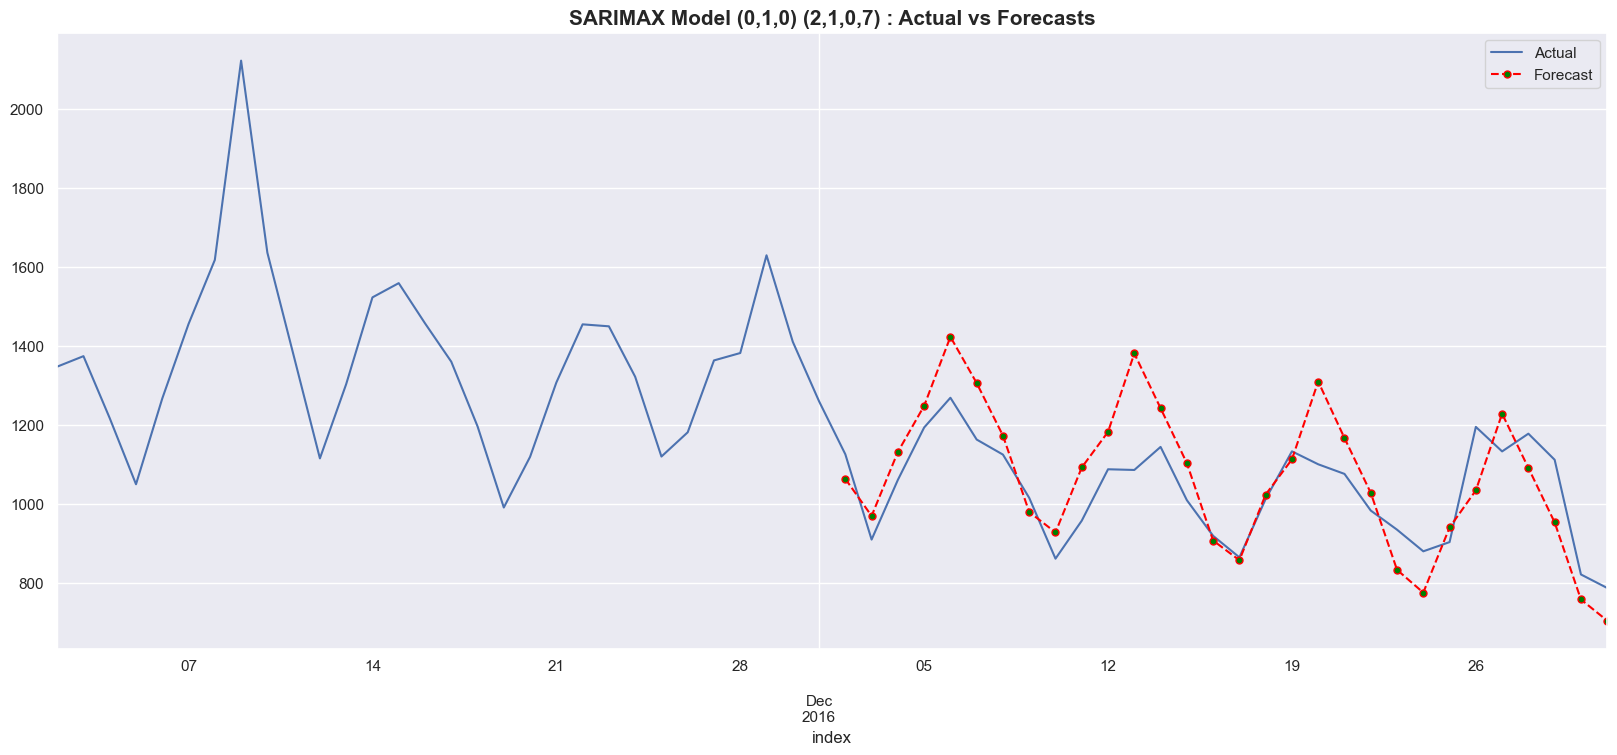

0

In [73]:
#Plotting SARIMAX model for each Language Time Series
languages = aggregated_data.columns
n = 30 
plot_best_SARIMAX_model(languages, aggregated_data, n, best_param_df)

# Forecasting using Facebook Prophet

In [74]:
!pip install numpy==1.22.4

  Using cached numpy-1.22.4.zip (11.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build numpy


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [227 lines of output]
  setup.py:66: RuntimeWarning: NumPy 1.22.4 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  INFO: blas_opt_info:
  INFO: blas_armpl_info:
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  INFO: customize MSVCCompiler
  INFO:   libraries armpl_lp64_mp not found in ['C:\\Users\\senth\\anaconda3\\lib', 'C:\\', 'C:\\Users\\senth\\anaconda3\\libs']
  INFO:   NOT AVAILABLE
  INFO:
  INFO: b

In [75]:
!pip install prophet

In [76]:
time_series = aggregated_data
time_series = time_series.reset_index()
time_series = time_series[['index', 'English']]
time_series.columns = ['ds', 'y']
exog = Exog_Campaign_eng.copy(deep = True)
time_series['exog'] = exog.values

In [77]:
time_series

,ds,y,exog
0,2015-07-01,3513.862203,0
1,2015-07-02,3502.511407,0
2,2015-07-03,3325.357889,0
3,2015-07-04,3462.054256,0
4,2015-07-05,3575.520035,0
...,...,...,...
545,2016-12-27,6040.680728,1
546,2016-12-28,5860.227559,1
547,2016-12-29,6245.127510,1
548,2016-12-30,5201.783018,0


In [86]:
from prophet import Prophet

16:41:32 - cmdstanpy - INFO - Chain [1] start processing
16:41:32 - cmdstanpy - INFO - Chain [1] done processing


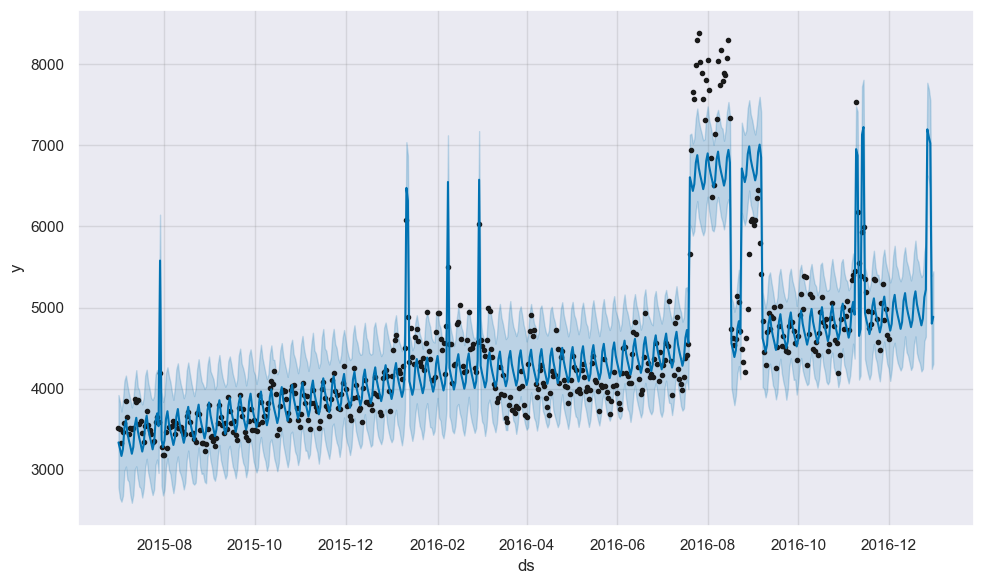

In [89]:
prophet2 = Prophet(weekly_seasonality=True)
prophet2.add_regressor('exog')
prophet2.fit(time_series[:-30])
#future2 = prophet2.make_future_dataframe(periods=30, freq= 'D')
forecast2 = prophet2.predict(time_series)
fig2 = prophet2.plot(forecast2)

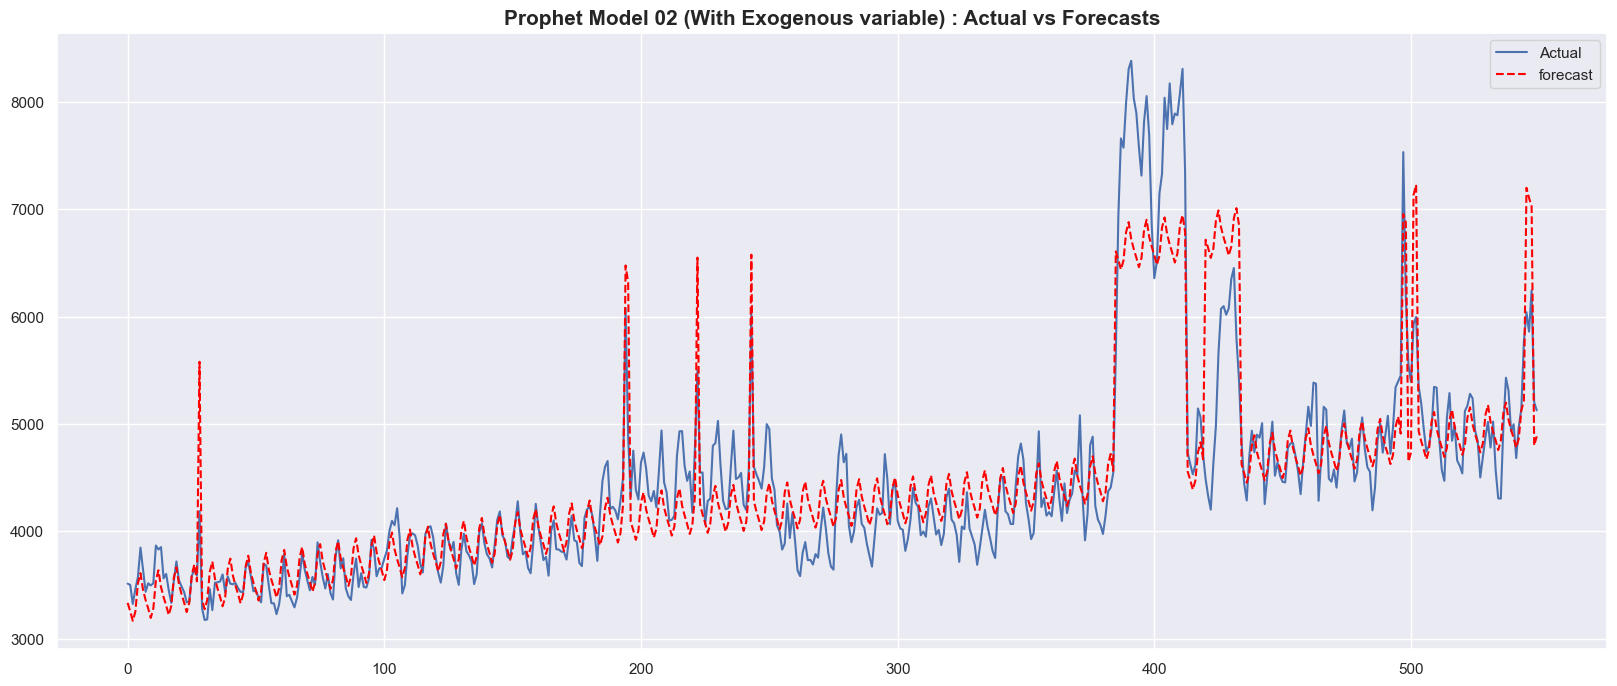

In [90]:
actual = time_series['y'].values
forecast = forecast2['yhat'].values

plt.figure(figsize = (20,8))
plt.plot(actual, label = 'Actual')
plt.plot(forecast, label = 'forecast', color = 'red', linestyle='dashed')
plt.legend(loc="upper right")
plt.title(f'Prophet Model 02 (With Exogenous variable) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

In [91]:
errors = abs(actual - forecast)
mape = np.mean(errors/abs(actual))
mape

0.059450593946555136


# Inferences and Recommendations : 

- inferences made from the data visualizations:

  - Total 7 languages found in data.
  - English has the highest number of pages.



  - 3 access types:
    - all-access    51.2295 %
    - mobile-web    24.7748 %
    - desktop       23.9958 %


  - 2 access origins:
    - agents    75.932526 %
    - spider    24.067474 %
    


  - English language has the highest pages. 
  - Maximum ads should be run on English Page. 




- What does the decomposition of series do?
  - 0The decomposition of a time series refers to the process of separating a time series into its components, such as trend, seasonality, and residuals. 
  - These components are intended to represent different underlying patterns in the data. The idea behind decomposition is to break down a complex time series into simpler components that can be more easily understood and analyzed.

  - Trend component represents the underlying pattern in the data over time, reflecting long-term changes.
  -  Seasonality component represents regular patterns that repeat over a fixed interval, such as daily, weekly, or yearly.
  -  Residual component represents the remaining random fluctuations in the data after removing the trend and seasonality components.
  - Decomposition is often used in time series analysis to identify and isolate different patterns in the data and to forecast future values. It is also used to remove seasonality and trend components from the data before applying statistical or machine learning models to the residuals, as this can help to improve the performance of these models.


- What level of differencing gave you a stationary series?

  - Stationarity is an important property of a time series because many time series analysis techniques assume that the time series is stationary.
  -  A time series is stationary if its mean, variance, and autocorrelation structure are constant over time.
  - Differencing is a common technique used to make a time series stationary. 
  - It involves subtracting the value of the time series at a previous time step from the current time step. 
  - This can help to remove trend and seasonality components from the data, making it more stationary. 
  - The order of differencing refers to the number of times the differencing operation is performed.
  - in this case study, differencing once yield a stationary time series.



---
- Difference between arima, sarima & sarimax.
---
  - ARIMA (AutoRegressive Integrated Moving Average) is a statistical model for time series data that accounts for both autoregression (the use of past values to predict future values) and moving average (the use of the residuals of past predictions to predict future values). 
  - It is a flexible method for modeling non-stationary time series data and can be used for both univariate and multivariate time series. 
  - ARIMA models are denoted by the notations ARIMA(p, d, q), where p is the order of the autoregression component, d is the order of differencing used to make the time series stationary, and q is the order of the moving average component.
---
  - SARIMA (Seasonal AutoRegressive Integrated Moving Average) is a variation of ARIMA that accounts for both seasonality and non-stationarity in time series data.
  - Seasonality refers to repeating patterns in the data over fixed time intervals, such as daily, weekly, or yearly. SARIMA models are denoted by the notations SARIMA(p, d, q)(P, D, Q, S), where p, d, and q are the same as in ARIMA models, P is the order of the seasonal autoregression component, D is the order of seasonal differencing, Q is the order of the seasonal moving average component, and S is the number of seasons in the data.
---
  - SARIMAX (Seasonal AutoRegressive Integrated Moving Average with exogenous regressors) is an extension of SARIMA that allows for the inclusion of exogenous variables, or variables that are not part of the time series data, in the modeling process.
  - SARIMAX models are useful when the time series data is influenced by other variables that are not part of the time series data, and can provide more accurate forecasts. 
  - SARIMAX models are denoted by the notations SARIMAX(p, d, q)(P, D, Q, S)x, where p, d, q, P, D, Q, and S are the same as in SARIMA models and x represents the number of exogenous variables included in the model.
---

- The equation for a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model can be expressed as follows:

      ARIMA(p, d, q)(P, D, Q, S):

         y(t) = c + φ1 * y(t-1) + φ2 * y(t-2) + ... + φp * y(t-p) 
                  + Θ1 * e(t-1) + Θ2 * e(t-2) + ... + Θq * e(t-q) 
                  + δ * y(t-S) + Φ1 * y(t-S-1) + Φ2 * y(t-S-2) + ... + ΦP * y(t-S-P) 
                  + Θ1 * e(t-S-1) + Θ2 * e(t-S-2) + ... + ΘQ * e(t-S-Q) + e(t)

                where:

                y(t) is the value of the time series at time step t.
                c is a constant.
                φ1, φ2, ..., φp are the autoregression coefficients.
                Θ1, Θ2, ..., Θq are the moving average coefficients.
                δ is a coefficient for the seasonal autoregression term.
                Φ1, Φ2, ..., ΦP are the seasonal autoregression coefficients.
                Θ1, Θ2, ..., ΘQ are the seasonal moving average coefficients.
                e(t), e(t-1), ..., e(t-q), e(t-S), e(t-S-1), ..., e(t-S-Q) are the residuals.
       - In a SARIMA model, the order of differencing (d) is used to make the time series stationary,
        the autoregression and moving average components (p and q) are used to model the autocorrelation structure of the residuals, 
        and the seasonal components (P, D, Q, and S) are used to model the seasonal patterns in the data.
         The coefficients in the model are estimated using maximum likelihood estimation or other optimization techniques,
          and the residuals are used to assess the goodness-of-fit of the model.


- Compare the number of views in different languages




<Axes: xlabel='Language'>

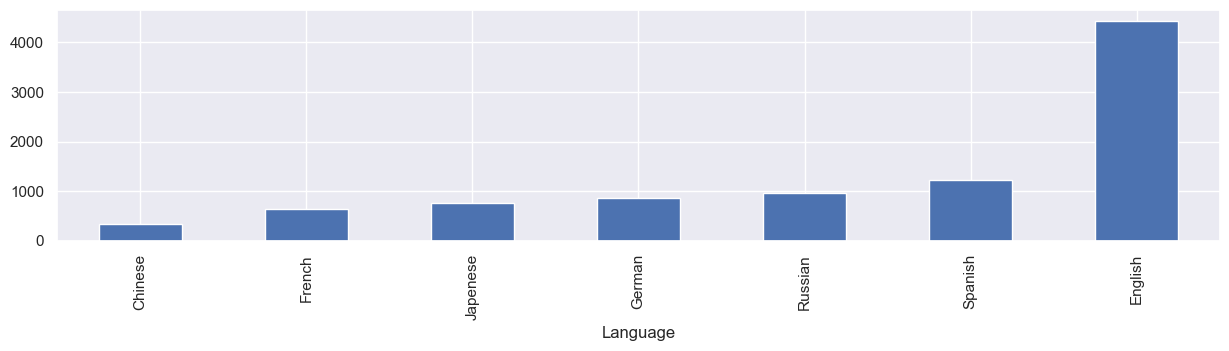

In [92]:
aggregated_data.mean().sort_values().plot(kind = 'bar')



- What other methods other than grid search would be suitable to get the model for all languages?

  - When estimating the values of p, q, and d from the ACF and PACF plots of a time series, the following steps can be taken:
    - Determine if the time series is stationary by conducting an augmented Dickey-Fuller test.
    - If the time series is stationary, attempt to fit an ARMA model. If it is non-stationary, determine the value of d.
    - If stationarity is achieved, plot the autocorrelation and partial autocorrelation graphs of the data.
    - Plot the partial autocorrelation graph (PACF) to determine the value of p, as the cut-off point in the PACF is equal to p.
    - Plot the autocorrelation graph (ACF) to determine the value of q, as the cut-off point in the ACF is equal to q